In this project we need to create a students table in mySQL and import it into the jupyter notebook by using the connector function and data is taken from the github and used in mySQL.

In [1]:
!pip install mysql-connector-python

In [2]:
import mysql.connector

In [3]:
import pandas as pd
con=mysql.connector.connect(
host='localhost',
    port=3306,
    user='root',
    password='Ssdevda9740@',
    database='studentdb')

In [4]:
df=pd.read_sql_query('select * from student',con)
df.head(10)

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,Name,Gender,DOB,0,0,0,0,0,0,0,0
1,John,M,05-04-1988,55,45,56,87,21,52,89,65
2,Suresh,M,04-05-1987,75,96,78,64,90,61,58,2
3,Ramesh,M,25-05-1989,25,54,89,76,95,87,56,74
4,Jessica,F,12-08-1990,78,96,86,63,54,89,75,45
5,Jennifer,F,02-09-1989,58,96,78,46,96,77,83,53
6,Annu,F,05-04-1988,45,87,52,89,55,89,87,52
7,pooja,F,04-05-1987,55,64,61,58,75,58,64,61
8,Ritesh,M,25-05-1989,54,76,87,56,25,56,76,87
9,Farha,F,12-08-1990,55,63,89,75,78,75,63,89


In [5]:
dn=df.drop(df.index[0])

Now we will try to see all the values which are in object and integer, and if in object convert it into
integer using LabelEncoder

In [6]:
dn.dtypes

Name         object
Gender       object
DOB          object
Maths         int64
Physics       int64
Chemistry     int64
English       int64
Biology       int64
Economics     int64
History       int64
Civics        int64
dtype: object

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dn['Gender']=le.fit_transform(dn['Gender'])
dn['Name']=le.fit_transform(dn['Name'])

In [8]:
dn

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
1,4,1,05-04-1988,55,45,56,87,21,52,89,65
2,8,1,04-05-1987,75,96,78,64,90,61,58,2
3,6,1,25-05-1989,25,54,89,76,95,87,56,74
4,3,0,12-08-1990,78,96,86,63,54,89,75,45
5,2,0,02-09-1989,58,96,78,46,96,77,83,53
6,0,0,05-04-1988,45,87,52,89,55,89,87,52
7,9,0,04-05-1987,55,64,61,58,75,58,64,61
8,7,1,25-05-1989,54,76,87,56,25,56,76,87
9,1,0,12-08-1990,55,63,89,75,78,75,63,89
10,5,1,02-09-1989,96,46,77,83,58,83,46,77


In [9]:
dq=dn.drop(['DOB'], axis=1)

In [10]:
dq

,Name,Gender,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
1,4,1,55,45,56,87,21,52,89,65
2,8,1,75,96,78,64,90,61,58,2
3,6,1,25,54,89,76,95,87,56,74
4,3,0,78,96,86,63,54,89,75,45
5,2,0,58,96,78,46,96,77,83,53
6,0,0,45,87,52,89,55,89,87,52
7,9,0,55,64,61,58,75,58,64,61
8,7,1,54,76,87,56,25,56,76,87
9,1,0,55,63,89,75,78,75,63,89
10,5,1,96,46,77,83,58,83,46,77


In [11]:
dq.dtypes

Name         int32
Gender       int32
Maths        int64
Physics      int64
Chemistry    int64
English      int64
Biology      int64
Economics    int64
History      int64
Civics       int64
dtype: object

In [12]:
dq.isnull().sum()

Name         0
Gender       0
Maths        0
Physics      0
Chemistry    0
English      0
Biology      0
Economics    0
History      0
Civics       0
dtype: int64

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

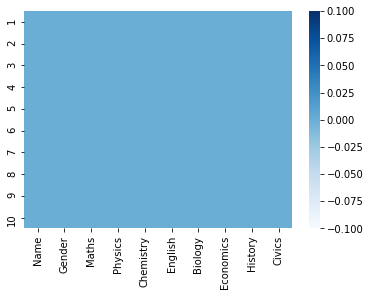

In [14]:
sns.heatmap(dq.isnull(), cmap='Blues')

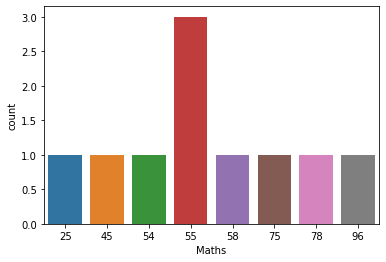

In [15]:
sns.countplot('Maths', data=dq)

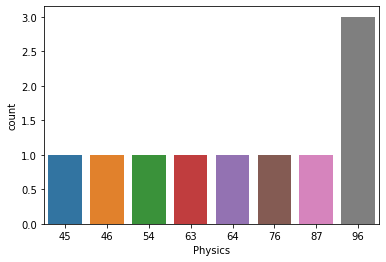

In [16]:
sns.countplot('Physics', data=dq)

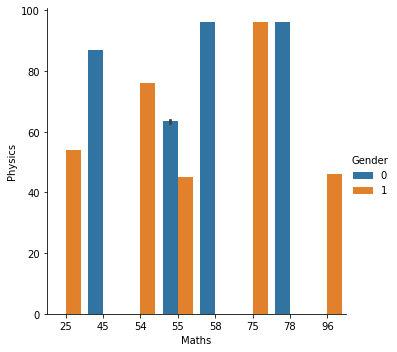

In [17]:
sns.catplot(x='Maths', y='Physics', data=dq, hue='Gender', kind='bar')

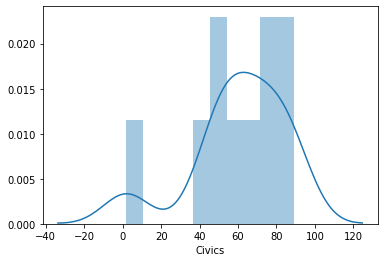

In [18]:
sns.distplot(dq.Civics, bins=10)

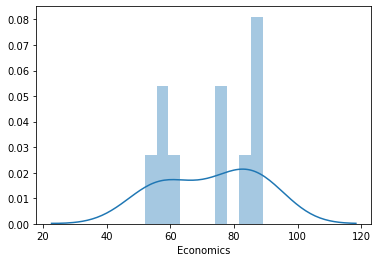

In [19]:
sns.distplot(dq.Economics, bins=10)

(array([1., 0., 0., 0., 1., 2., 1., 1., 2., 2.]),
 array([ 2. , 10.7, 19.4, 28.1, 36.8, 45.5, 54.2, 62.9, 71.6, 80.3, 89. ]),
 <a list of 10 Patch objects>)

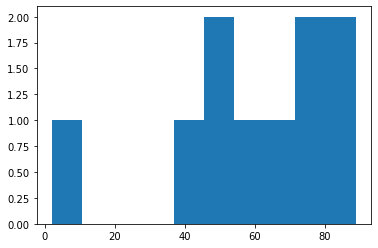

In [20]:
plt.hist(dq.Civics, bins=10)

(array([1., 1., 1., 0., 0., 0., 1., 2., 0., 4.]),
 array([52. , 55.7, 59.4, 63.1, 66.8, 70.5, 74.2, 77.9, 81.6, 85.3, 89. ]),
 <a list of 10 Patch objects>)

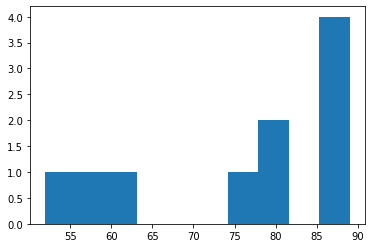

In [21]:
plt.hist(dq.Chemistry, bins=10)

In [ ]:
Now trying to remove the skew data from the original data.

In [22]:
do=dq.copy()

In [23]:
do.skew()

Name         0.000000
Gender       0.000000
Maths        0.246964
Physics     -0.045336
Chemistry   -0.746462
English     -0.131222
Biology     -0.496446
Economics   -0.245555
History     -0.131222
Civics      -1.332448
dtype: float64

In [24]:
dq.corr()

,Name,Gender,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
Name,1.000000,0.522233,0.086747,-0.178507,0.103540,-0.344050,0.046896,-0.573218,-0.478623,-0.187525
Gender,0.522233,1.000000,0.075832,-0.454052,0.158109,0.255257,-0.269398,-0.353067,-0.342774,0.020796
Maths,0.086747,0.075832,1.000000,0.113354,0.076751,-0.064074,-0.146598,0.000312,-0.320846,-0.274629
Physics,-0.178507,-0.454052,0.113354,1.000000,0.117192,-0.562608,0.279638,0.191851,0.334082,-0.643266
Chemistry,0.103540,0.158109,0.076751,0.117192,1.000000,-0.409680,0.318032,0.235390,-0.482710,0.210908
English,-0.344050,0.255257,-0.064074,-0.562608,-0.409680,1.000000,-0.330844,0.237577,-0.038775,0.186705
Biology,0.046896,-0.269398,-0.146598,0.279638,0.318032,-0.330844,1.000000,0.370531,-0.456131,-0.330060
Economics,-0.573218,-0.353067,0.000312,0.191851,0.235390,0.237577,0.370531,1.000000,-0.164953,0.043905
History,-0.478623,-0.342774,-0.320846,0.334082,-0.482710,-0.038775,-0.456131,-0.164953,1.000000,-0.048686
Civics,-0.187525,0.020796,-0.274629,-0.643266,0.210908,0.186705,-0.330060,0.043905,-0.048686,1.000000


In [25]:
dq.describe()

,Name,Gender,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0000
mean,4.50000,0.500000,59.600000,72.300000,75.300000,69.700000,64.700000,72.700000,69.700000,60.5000
std,3.02765,0.527046,19.460501,20.661559,14.000397,14.453373,26.998148,14.629119,14.453373,25.3432
min,0.00000,0.000000,25.000000,45.000000,52.000000,46.000000,21.000000,52.000000,46.000000,2.0000
25%,2.25000,0.000000,54.250000,56.250000,65.000000,59.250000,54.250000,58.750000,59.250000,52.2500
50%,4.50000,0.500000,55.000000,70.000000,78.000000,69.500000,66.500000,76.000000,69.500000,63.0000
75%,6.75000,1.000000,70.750000,93.750000,86.750000,81.250000,87.000000,86.000000,81.250000,76.2500
max,9.00000,1.000000,96.000000,96.000000,89.000000,89.000000,96.000000,89.000000,89.000000,89.0000


Removing the outliers and cleaning the unwanted data is one of the most important aspect for model building as well.

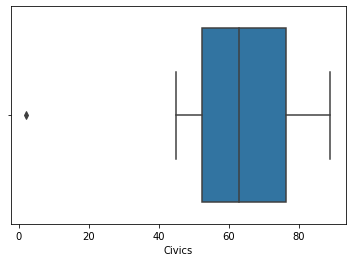

In [26]:
sns.boxplot(dq.Civics)

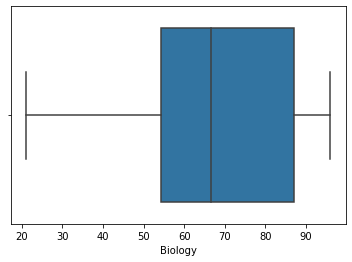

In [27]:
sns.boxplot(dq.Biology)

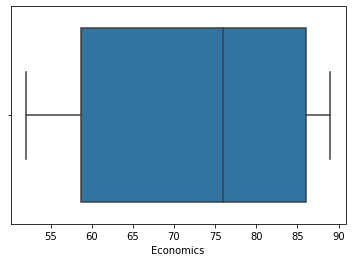

In [28]:
sns.boxplot(dq.Economics)

In [29]:
from scipy.stats import zscore
z=np.abs(zscore(dq))
de=dq[(z<3).all(axis=1)]
de

,Name,Gender,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
1,4,1,55,45,56,87,21,52,89,65
2,8,1,75,96,78,64,90,61,58,2
3,6,1,25,54,89,76,95,87,56,74
4,3,0,78,96,86,63,54,89,75,45
5,2,0,58,96,78,46,96,77,83,53
6,0,0,45,87,52,89,55,89,87,52
7,9,0,55,64,61,58,75,58,64,61
8,7,1,54,76,87,56,25,56,76,87
9,1,0,55,63,89,75,78,75,63,89
10,5,1,96,46,77,83,58,83,46,77


In [30]:
x=de.iloc[:,1:4]
y=de.iloc[:,5]

In [31]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
x=sd.fit_transform(x)

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
max_scr=0
for rstate in range(42,100):
    x_test,x_train,y_test,y_train=train_test_split(x,y,random_state=rstate, test_size=0.20)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_yl=lr.predict(x_test)
    r2_scr=r2_score(y_test,pred_yl)
    if r2_scr>max_scr:
        max_scr=r2_scr
        final_rstate=rstate
        
print('The corresponding value for maximum rstate',final_rstate, 'to the r2 Score is', max_scr)

The corresponding value for maximum rstate 52 to the r2 Score is 0.1605418705792807


In [33]:
from sklearn.model_selection import cross_val_score
cr_val_scr=cross_val_score(lr,x,y,cv=5,scoring='r2').mean()
cr_val_scr

-62.40335308171957

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge
alpha_value={'alpha':[1,0.1,0.01,0.001]}
model=Ridge(),Lasso()
for m in model:
    grid=GridSearchCV(estimator=m, param_grid=alpha_value, cv=5)
    grid.fit(x,y)
    print(grid.best_params_)
    print(grid.best_score_)

{'alpha': 1}
-60.67437960915947
{'alpha': 1}
-58.45044655152859


In [35]:
ls=Lasso(alpha=1)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_y=ls.predict(x_test)
r2_scrl=r2_score(y_test,pred_y)
print('r2 score',r2_scrl)
print(mean_squared_error(y_test,pred_y))

r2 score -2.722615249287964
653.2608103867675


In [36]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

-1.1617260796011033

In [37]:
from sklearn.ensemble import AdaBoostRegressor
import warnings
warnings.filterwarnings('ignore')
adc=AdaBoostRegressor()
parameters={'n_estimators':[10,100,500,1000],'learning_rate':[0.001,0.01,0.1,1] }
gsv=GridSearchCV(adc,parameters,cv=5)
gsv.fit(x,y)


GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                         loss='linear', n_estimators=50,
                                         random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'n_estimators': [10, 100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [38]:
gsv.best_params_

{'learning_rate': 0.001, 'n_estimators': 10}

In [39]:
adb=AdaBoostRegressor(learning_rate= 1, n_estimators= 10)
adb.fit(x_train,y_train)
pred_y=adb.predict(x_test)
r2_scr=r2_score(y_test,pred_y)
r2_scr

-0.3996972664945242

In [43]:
df1=pd.DataFrame(pred_yl)
df1.to_csv('Lr_prediction.csv')

In [46]:
from sklearn.externals import joblib
joblib.dump(lr,'lr_Student_marks.pkl')

['lr_Student_marks.pkl']

In this model the cross_val_score is showing negative results, tried all the combinations with the x and y,
still showing the negative results indicationg underfitting of the values.
Therefore all in over considered the linear regression score the preferred one.

In [40]:
print(grid.best_params_)

{'alpha': 1}
